https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download

#### 1. Загружаем датасет

In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('Cancer_Data.csv')
df = df.iloc[:, 1:12]
df = df.replace({'diagnosis': {'M': 0, 'B': 1}})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


In [34]:
df.isna().sum().sum()

0

In [35]:
vMin = df.min(axis=0)
x = (df - vMin) / (df.max(axis=0) - vMin)
x

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816
...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056
565,0.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100
566,0.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321
567,0.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442


#### 2. Выполнить классификацию методом навного байесовского классификатора:

##### 1. Выполнить классификацию, используя следующие его модификации НБ:

##### 1.1 GaussianNB

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split

X =  np.array(x.iloc[:,1:])#.reshape(-1,11)
Y =  np.array(x.iloc[:, 0])#.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.9238845144356955
TEST ACCURACY : 0.898936170212766


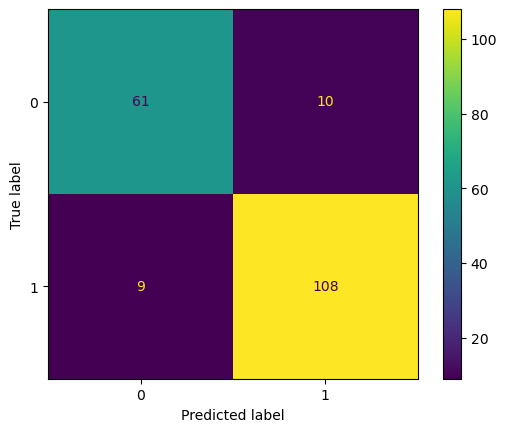

In [42]:
import matplotlib.pyplot as plt

confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

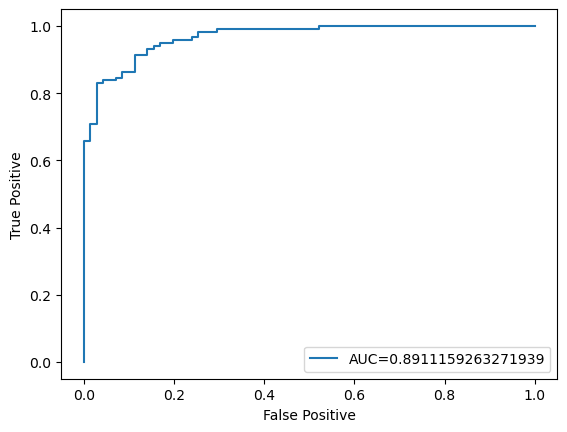

In [43]:
auc = roc_auc_score( y_test, y_test_predict )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

##### 1.2 MultinomialNB() 

In [44]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

In [45]:
print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.6902887139107612
TEST ACCURACY : 0.6968085106382979


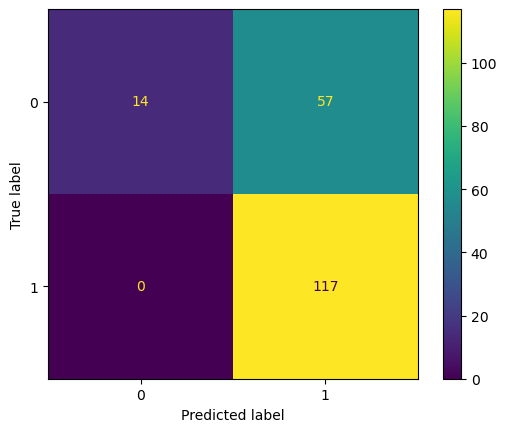

In [46]:
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

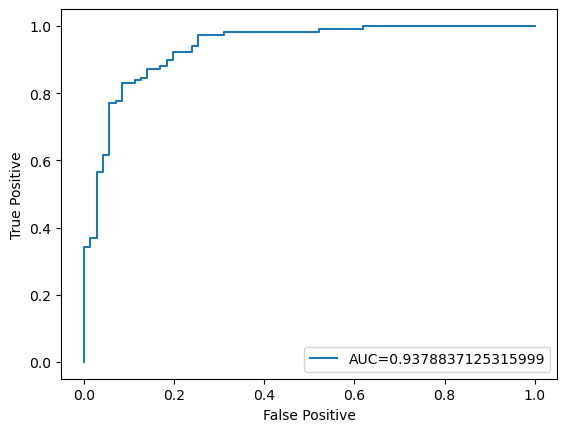

In [47]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

##### 1.3 ComplementNB()

In [48]:
nb = ComplementNB()

nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

In [49]:
print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.847769028871391
TEST ACCURACY : 0.8670212765957447


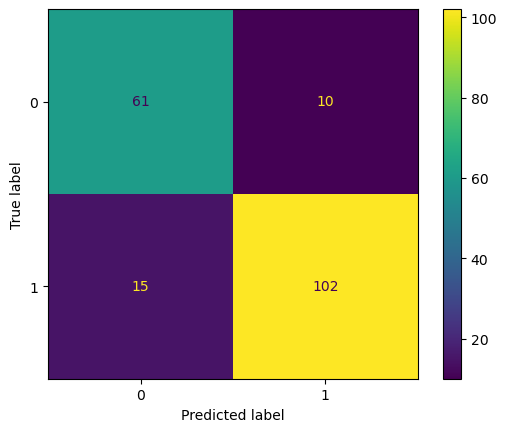

In [50]:
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

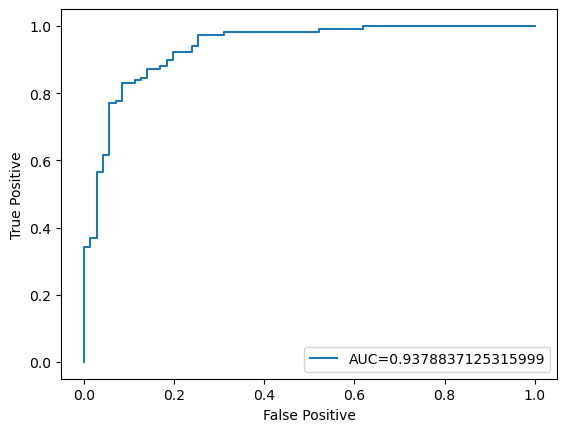

In [51]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

##### 1.4. BernoulliNB()

In [52]:
nb = BernoulliNB()

nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

In [53]:
print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.6299212598425197
TEST ACCURACY : 0.6276595744680851


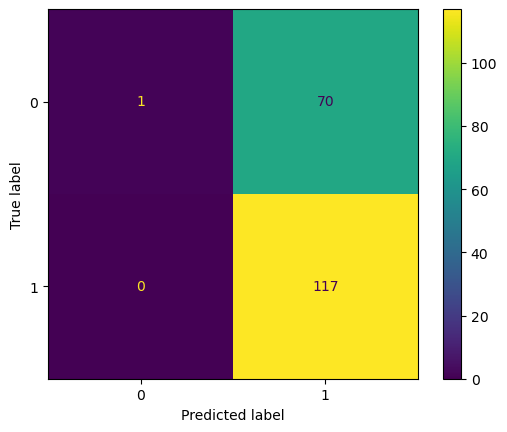

In [54]:
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

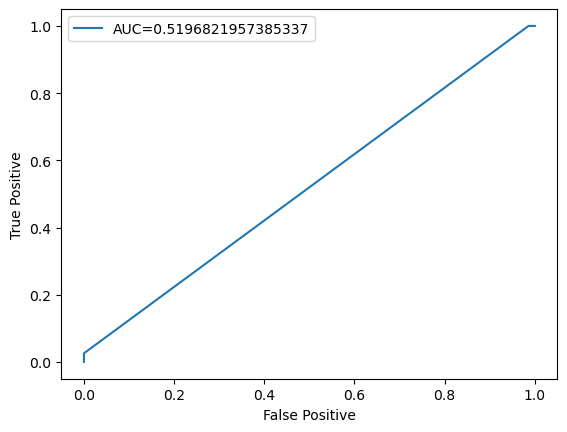

In [55]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

#### 3. Выполнить классификацию с использованием дерева решений:

##### 1. Попробовать подобрать опытным путем наилучшие значения параметров дерева решений

In [70]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier( criterion = "gini", random_state = 40, min_samples_split = 8, min_samples_leaf = 3 )

# criterion {“gini”, “entropy”, “log_loss”}, default=”gini”
# splitter {“best”, “random”}, default=”best”
# max_depth int, default=None
# min_samples_split int or float, default=2
# min_samples_leaf int or float, default=1

clf.fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)[:,1]

In [71]:
print('TRAIN ACCURACY :', accuracy_score( y_train_predict, y_train ))
print('TEST ACCURACY :', accuracy_score( y_test_predict, y_test ))

TRAIN ACCURACY : 0.9763779527559056
TEST ACCURACY : 0.9361702127659575


##### 2. Вычислить метрики качества классификации (Confusion Matrix, ROC + AUC)

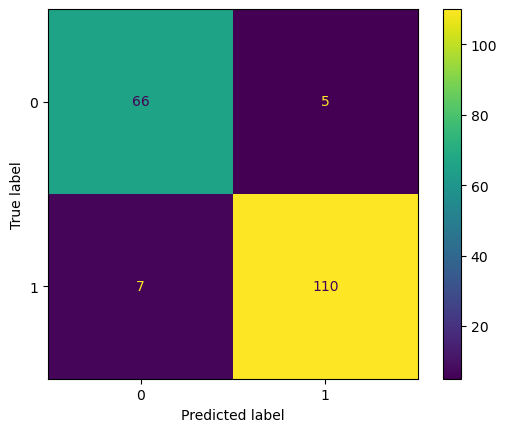

In [72]:
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

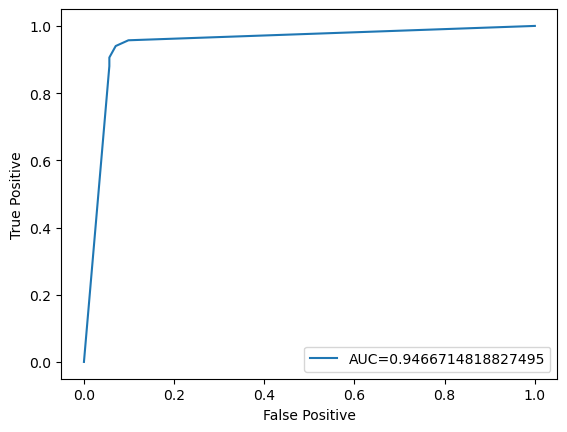

In [73]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()

##### 3. Визуализировать построенное дерево решений (текстовая визуализация, графическая визуализация)

In [75]:
from sklearn import tree

textDescr = tree.export_text(clf, feature_names = list(df.columns[:-1]) )
print(textDescr)

|--- concavity_mean <= 0.26
|   |--- diagnosis <= 0.38
|   |   |--- concavity_mean <= 0.24
|   |   |   |--- radius_mean <= 0.43
|   |   |   |   |--- concavity_mean <= 0.17
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- concavity_mean >  0.17
|   |   |   |   |   |--- compactness_mean <= 0.10
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- compactness_mean >  0.10
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- radius_mean >  0.43
|   |   |   |   |--- area_mean <= 0.34
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- area_mean >  0.34
|   |   |   |   |   |--- symmetry_mean <= 0.24
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- symmetry_mean >  0.24
|   |   |   |   |   |   |--- class: 1.0
|   |   |--- concavity_mean >  0.24
|   |   |   |--- class: 1.0
|   |--- diagnosis >  0.38
|   |   |--- radius_mean <= 0.30
|   |   |   |--- class: 1.0
|   |   |--- radius_mean >  0.30
|   |   |   |--- concavity_mean <= 0.14
|   |   |   |   |-

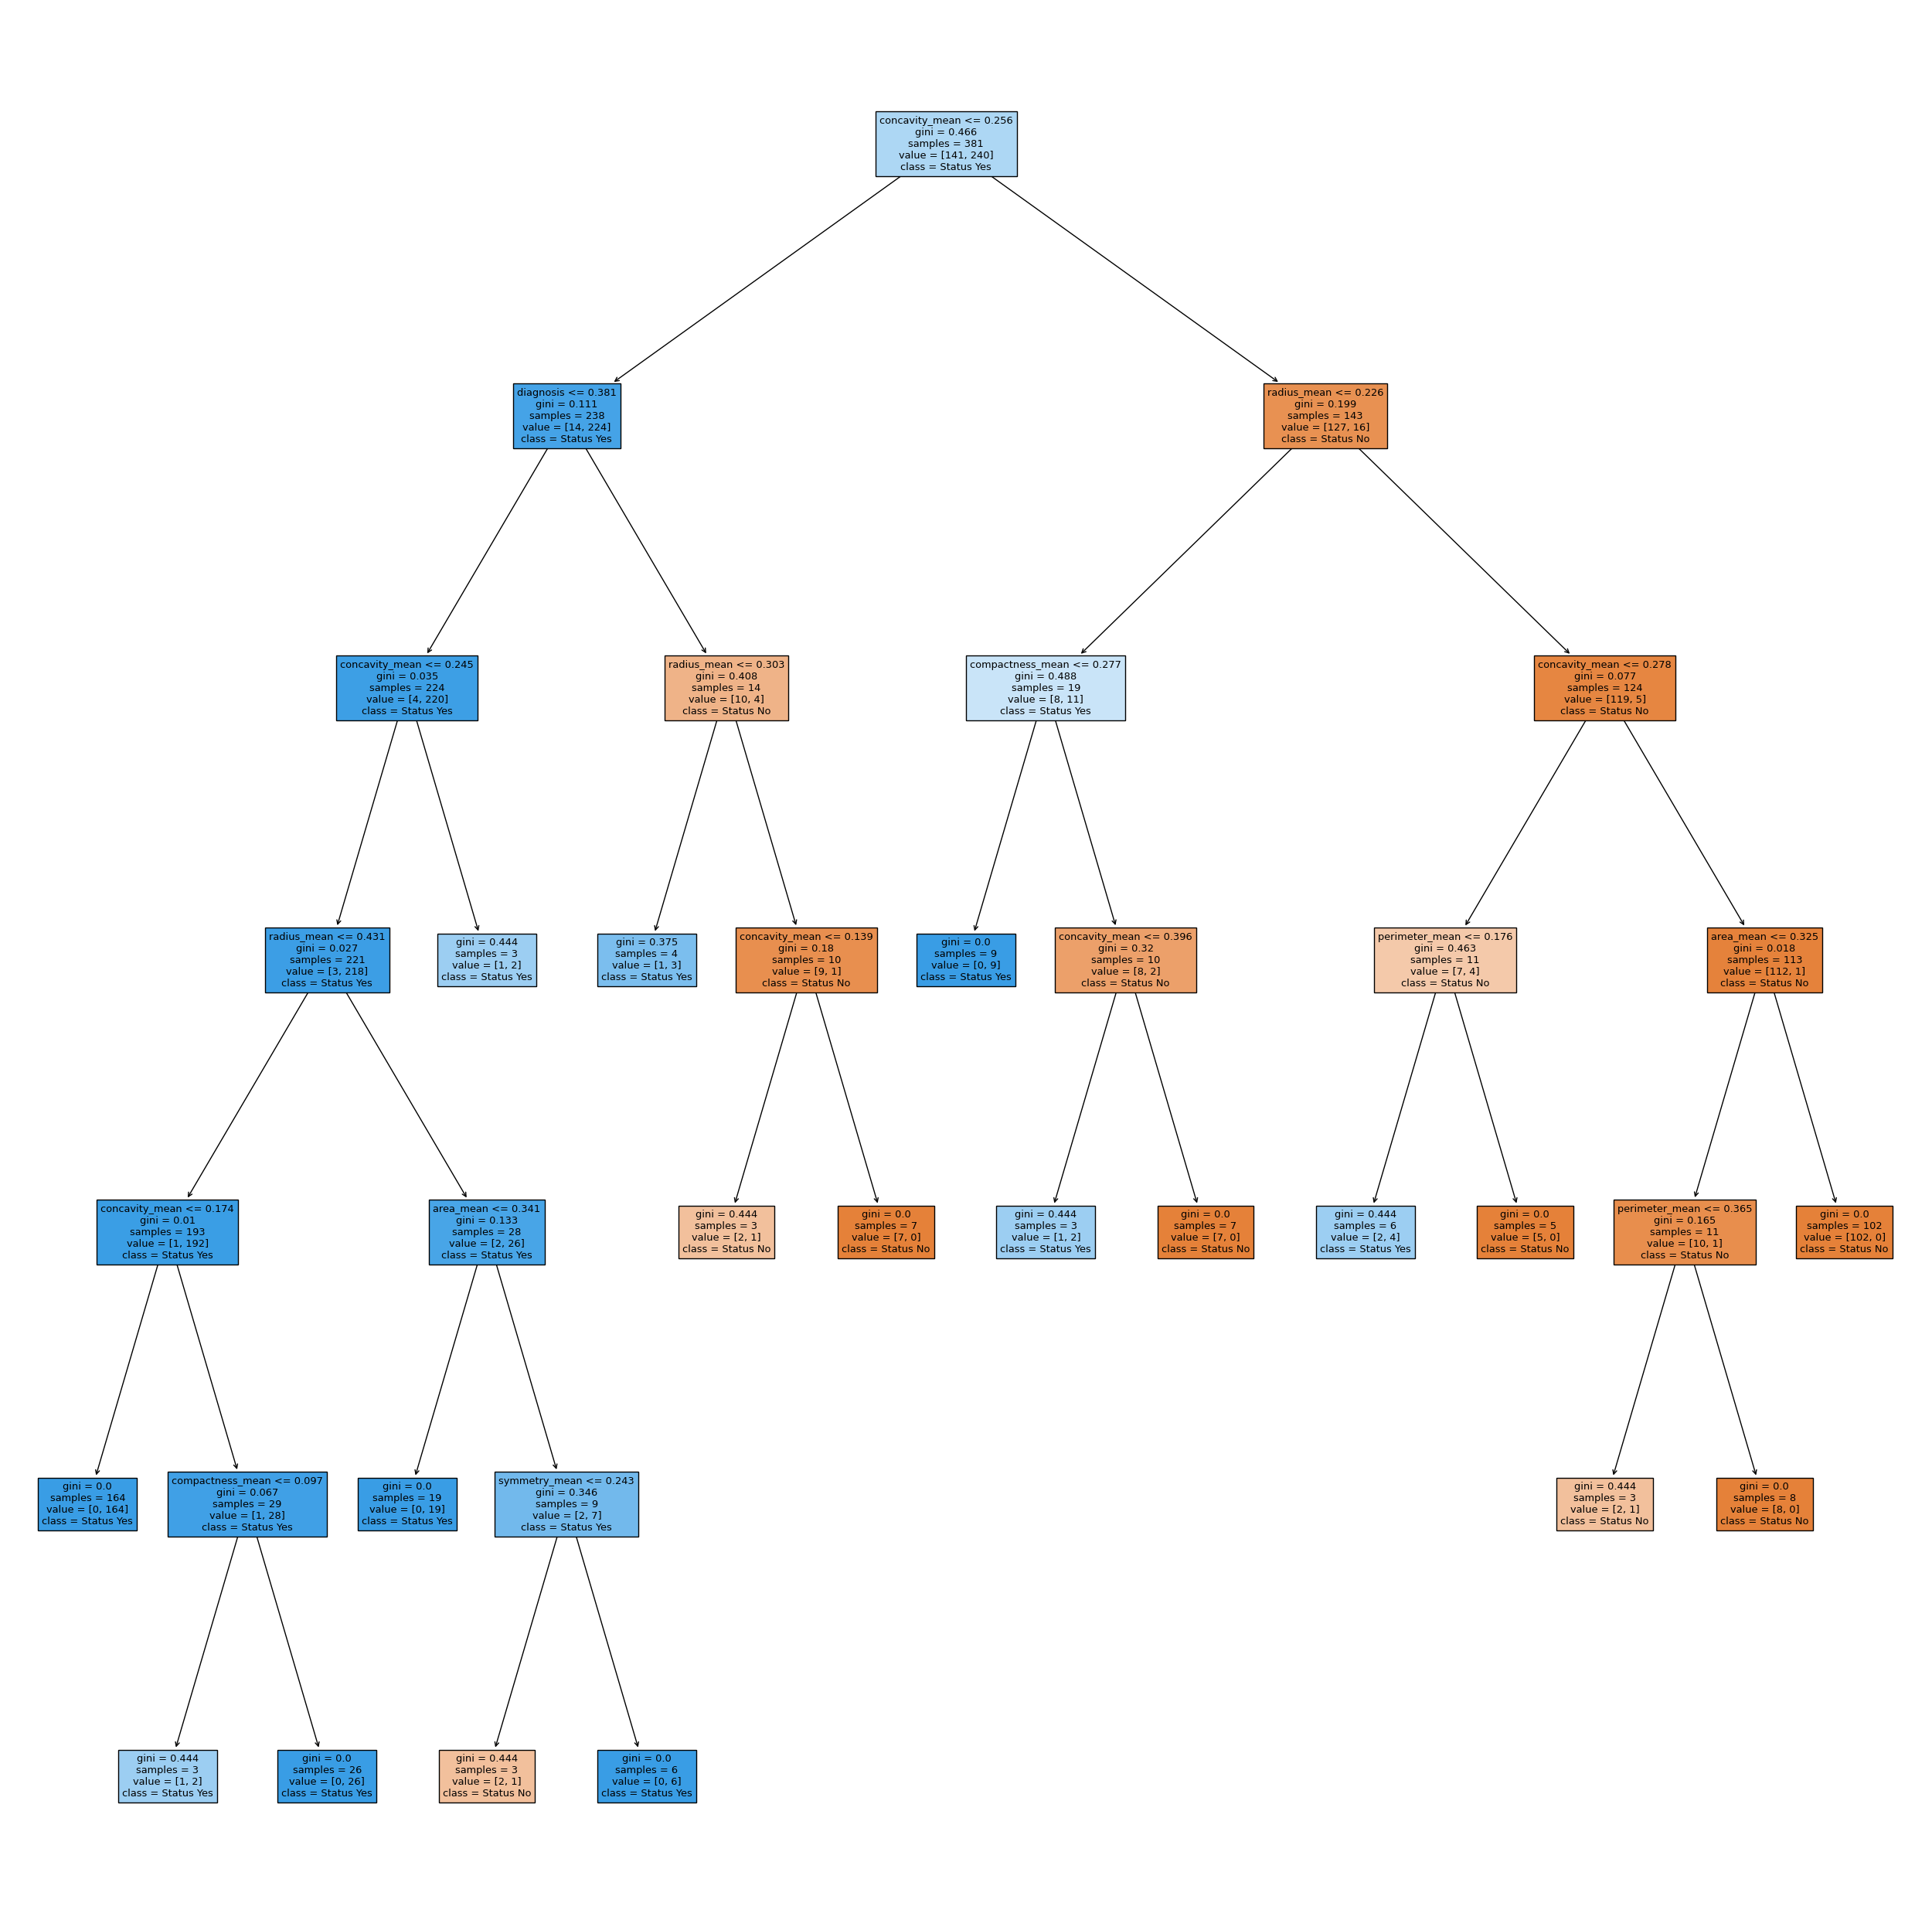

In [76]:
fig = plt.figure(figsize=(32,32))
res = tree.plot_tree(clf, 
                   feature_names = list(df.columns[:-1]) ,  
                   class_names = ["Status No", "Status Yes"],
                   filled = True)

#### 4. Выполнить кросс-валидацию

##### 1. Для любых моделей классификации - созданных в предыдещих заданиях или новых специально созданных - выполнить кросс-валидацию

##### 1.1 Методом K-блочной кросс-валидации (попробовать с различным количеством блоков)

In [78]:
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)


from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# Создаем объект KFold с числом блоков K=5
kFold = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Создаем модель для классификации
knn = KNeighborsClassifier(n_neighbors = 5)

# Выполняем кросс-валидацию
scores = cross_val_score(knn, X_test, y_test, cv = kFold)

# Выводим оценки производительности модели на каждой складке
print(f"Оценки производительности модели на каждом блоке: {scores}")
# Выводим среднюю оценку производительности модели
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Оценки производительности модели на каждом блоке: [0.89473684 0.94736842 0.94736842 0.94594595 0.89189189]
Средняя оценка качества прогнозирования модели: 0.9254623044096728, средний разброс значений: 0.026269229504384175


In [83]:
# Создаем объект KFold с числом блоков K=10
kFold = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Создаем модель для классификации
knn = KNeighborsClassifier(n_neighbors = 10)

# Выполняем кросс-валидацию
scores = cross_val_score(knn, X_test, y_test, cv = kFold)

# Выводим оценки производительности модели на каждой складке
print(f"Оценки производительности модели на каждом блоке: {scores}")
# Выводим среднюю оценку производительности модели
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Оценки производительности модели на каждом блоке: [0.84210526 0.94736842 0.89473684 1.         0.94736842 0.89473684
 0.94736842 0.94736842 0.77777778 0.94444444]
Средняя оценка качества прогнозирования модели: 0.914327485380117, средний разброс значений: 0.06102711146849649


##### 1.2 Методом стратифицированной K-блочная кросс-валидации (предварительно проанализировать доли каждого класса в выборках)

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Создаем объект StratifiedKFold с числом блоков K=5
stratifiedKfold = StratifiedKFold(n_splits=5, shuffle = True)

# Создаем модель для классификации
lr = LogisticRegression(multi_class = "ovr",max_iter=1000)

# Выполняем стратифицированную кросс-валидацию
scores = cross_val_score(lr, X_test, y_test, cv = stratifiedKfold)

print(f"Оценки производительности модели на каждом блоке: {scores}")
# Выводим среднюю оценку производительности модели
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Оценки производительности модели на каждом блоке: [0.92105263 0.94736842 0.94736842 0.81081081 1.        ]
Средняя оценка качества прогнозирования модели: 0.9253200568990042, средний разброс значений: 0.06273744174544986


##### 1.3 Методом Leave-One-Out

In [81]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
dtc = DecisionTreeClassifier()

scores = cross_val_score(dtc, X_test, y_test, cv = loo, n_jobs = -1)

#print(f"Оценки производительности модели на каждом блоке: {scores}")
print(f"Количество блоков: {len(scores)}")
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Количество блоков: 188
Средняя оценка качества прогнозирования модели: 0.8457446808510638, средний разброс значений: 0.36119332173116936


##### 1.4* Методом групповой кросс-валидации (Если в наборе данных присутствуют группы объектов)

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression

# Создаем объект GroupKFold с числом блоков K=5
group_kfold = GroupKFold(n_splits=5)

# Создаем модель для регрессии, например, линейную регрессию
model = LinearRegression()
groups = X_test
# Выполняем групповую кросс-валидацию
scores = cross_val_score(model, X_test, y_test, groups=groups, cv=group_kfold)

# Выводим оценки производительности модели на каждой складке
print("Оценки производительности модели на каждой складке:", scores)
# Выводим среднюю оценку производительности модели
print("Средняя оценка производительности модели:", scores.mean())

##### 2. Проанализировать результаты выполненной кросс-валидации (средний показатель метрики по каждому методу, у какого метода меньший и больший целевой показатель) 

###### K-fold (k=5): Средняя оценка качества прогнозирования модели: 0.9254623044096728, средний разброс значений: 0.026269229504384175

###### K-fold (k=10): Средняя оценка качества прогнозирования модели: 0.914327485380117, средний разброс значений: 0.06102711146849649

###### StratifiedKFold: Средняя оценка качества прогнозирования модели: 0.9253200568990042, средний разброс значений: 0.06273744174544986

###### Leave-One-Out: Средняя оценка качества прогнозирования модели: 0.8457446808510638, средний разброс значений: 0.36119332173116936

###### Лучшие показатели демонстрируют методы K-fold (k=5) и StratifiedKFold